### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [5]:
for col in data.columns:
    print('Column Name:',col)
    print('Value Counts')
    print(data[col].fillna('None').value_counts())
    print('========================')

Column Name: destination
Value Counts
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
Column Name: passanger
Value Counts
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Column Name: weather
Value Counts
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
Column Name: temperature
Value Counts
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
Column Name: time
Value Counts
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
Column Name: coupon
Value Counts
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
Column Name: expiration
Value Counts
expiration
1d    7091
2h    5593
Name: count, dtype: int64
Column Name: gender
Value Counts
gender
Female 

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
data['Bar'] = data['Bar'].fillna('never')
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
def accept_rate(df):
    accept_stat = ((df['Y'].value_counts() / df.shape[0]) * 100).round(2).astype(str) + '%'
    accept_stat.index = accept_stat.index.map({1:'Accept Rate',0:'Reject Rate'}).rename(None)
    return accept_stat.sort_index()

In [8]:
data_accept_stat = accept_rate(data)
print('All Sample Acceptance Rate')
display(data_accept_stat)

All Sample Acceptance Rate


Accept Rate    56.84%
Reject Rate    43.16%
Name: count, dtype: object

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Descriptive Stats of Coupon Type')

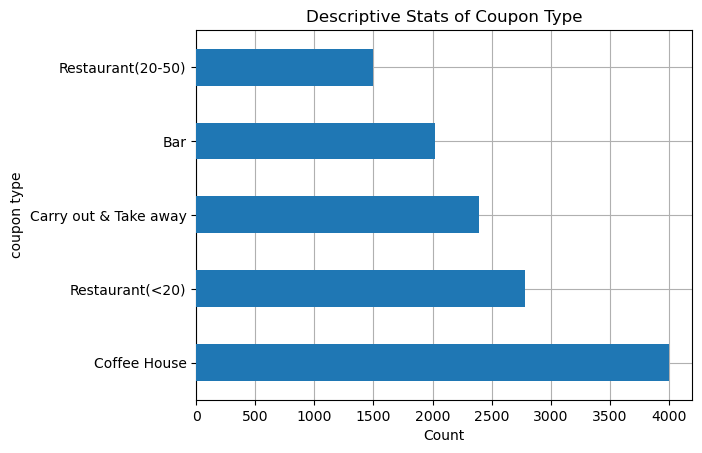

In [9]:
data['coupon'].value_counts().plot.barh(zorder=3)
plt.xlabel('Count')
plt.ylabel('coupon type')
plt.grid(zorder=0); plt.title('Descriptive Stats of Coupon Type')

Text(0.5, 1.0, 'Descriptive Stats of Coupon Type')

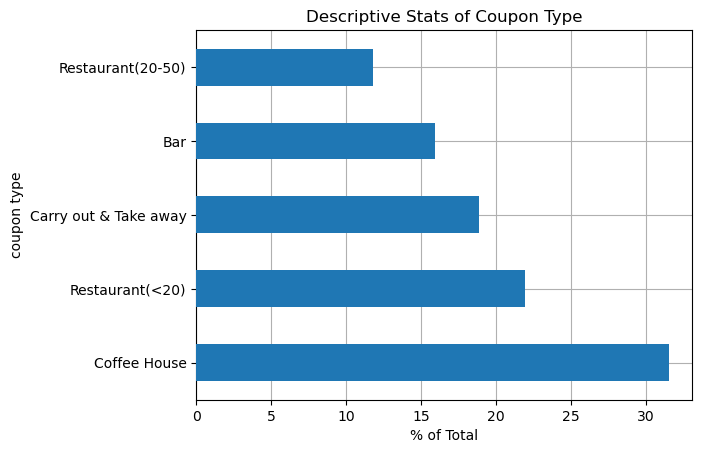

In [10]:
(data['coupon'].value_counts() / data['coupon'].notnull().sum() * 100).plot.barh(zorder=3)
plt.xlabel('% of Total')
plt.ylabel('coupon type')
plt.grid(zorder=0); plt.title('Descriptive Stats of Coupon Type')

6. Use a histogram to visualize the temperature column.

Text(0.5, 0, 'Temperature')

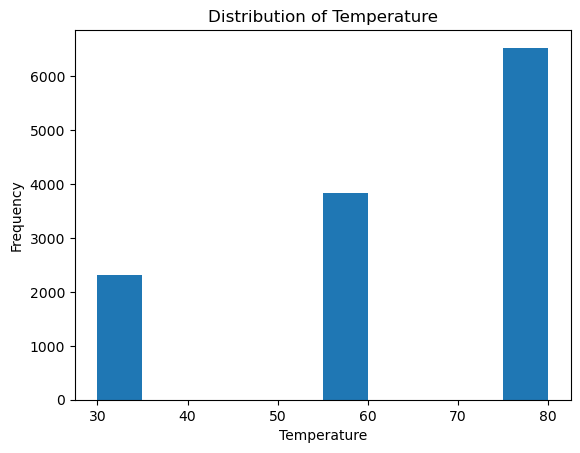

In [11]:
data['temperature'].plot.hist(title='Distribution of Temperature')
plt.xlabel('Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
data_bar = data.loc[data.coupon == 'Bar']
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [13]:
data_bar['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

2. What proportion of bar coupons were accepted?


In [14]:
bar_accept_stat = accept_rate(data_bar)
print('Bar Coupon Acceptance Rate')
display(bar_accept_stat)

Bar Coupon Acceptance Rate


Accept Rate    41.0%
Reject Rate    59.0%
Name: count, dtype: object

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
data_bar_less = data_bar[data_bar.Bar.isin(['never', 'less1', '1~3'])]
data_bar_more = data_bar[data_bar.Bar.isin(['4~8', 'gt8'])]

In [16]:
bar_less_accept_stat = accept_rate(data_bar_less)
print('Bar Coupon Acceptance Rate (3 or fewer)')
display(bar_less_accept_stat)

Bar Coupon Acceptance Rate (3 or fewer)


Accept Rate    37.07%
Reject Rate    62.93%
Name: count, dtype: object

In [17]:
bar_more_accept_stat = accept_rate(data_bar_more)
print('Bar Coupon Acceptance Rate (4 or more)')
display(bar_more_accept_stat)

Bar Coupon Acceptance Rate (4 or more)


Accept Rate    76.88%
Reject Rate    23.12%
Name: count, dtype: object

### Drivers who go to the bar 4 or more times a month is much more likely to accept the bar coupon than the drivers who only go to the bar 3 or less times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# Nobody checking their ID???
data_bar.loc[(data_bar.Bar != 'never') & (data_bar.age.isin(['below21']))].T

,4434,4444,6517,6531,9008,9013,9016,9020,9536,9538,...,9548,9552,10494,10499,10502,10506,11498,11499,11502,11517
destination,No Urgent Place,No Urgent Place,No Urgent Place,Home,No Urgent Place,Home,Work,Work,No Urgent Place,No Urgent Place,...,Work,Work,No Urgent Place,Home,Work,Work,No Urgent Place,No Urgent Place,No Urgent Place,Work
passanger,Alone,Partner,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Partner,...,Alone,Alone,Alone,Alone,Alone,Alone,Friend(s),Friend(s),Alone,Alone
weather,Sunny,Sunny,Sunny,Sunny,Snowy,Rainy,Sunny,Rainy,Snowy,Sunny,...,Sunny,Rainy,Snowy,Rainy,Sunny,Rainy,Sunny,Sunny,Rainy,Snowy
temperature,80,80,80,80,30,55,30,55,30,55,...,30,55,30,55,30,55,80,55,55,30
time,10AM,6PM,10AM,10PM,2PM,6PM,7AM,7AM,2PM,2PM,...,7AM,7AM,2PM,6PM,7AM,7AM,10PM,10PM,10AM,7AM
coupon,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,...,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar,Bar
expiration,1d,2h,1d,1d,1d,1d,1d,1d,1d,1d,...,1d,1d,1d,1d,1d,1d,1d,2h,1d,1d
gender,Male,Male,Male,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Male,Male,Male,Male,Female,Female,Female,Female
age,below21,below21,below21,below21,below21,below21,below21,below21,below21,below21,...,below21,below21,below21,below21,below21,below21,below21,below21,below21,below21
maritalStatus,Unmarried partner,Unmarried partner,Single,Single,Single,Single,Single,Single,Unmarried partner,Unmarried partner,...,Unmarried partner,Unmarried partner,Single,Single,Single,Single,Single,Single,Single,Single


In [19]:
data_4_1 = data_bar.loc[(data_bar.Bar != 'never') & (~data_bar.age.isin(['21','below21']))]
data_4_2 = data_bar.loc[data_bar.index.difference(data_4_1.index)]

In [20]:
data_4_1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12643,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1
12647,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12652,Home,Partner,Sunny,30,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,1,0,1,1


In [21]:
data_4_2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [22]:
bar_1_stat = accept_rate(data_4_1)
print('Drivers who go to a bar more than once a month and are over the age of 25 Acceptance Rate')
display(bar_1_stat)

Drivers who go to a bar more than once a month and are over the age of 25 Acceptance Rate


Accept Rate    54.6%
Reject Rate    45.4%
Name: count, dtype: object

In [23]:
bar_2_stat = accept_rate(data_4_2)
print('All Others Acceptance Rate')
display(bar_2_stat)

All Others Acceptance Rate


Accept Rate    30.69%
Reject Rate    69.31%
Name: count, dtype: object

### Drivers who satisfy the above criterion (who go to a bar more than once a month and are over the age of 25) will be much more likely to accept a Bar coupon than all the others

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
data_bar['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [25]:
data_5_1 = data_bar.loc[(data_bar.Bar != 'never') & 
                        (data_bar.passanger.isin(['Friend(s)', 'Partner'])) & 
                        (data_bar.occupation != 'Farming Fishing & Forestry')]
data_5_2 = data_bar.loc[data_bar.index.difference(data_5_1.index)]

In [26]:
print('Goes to bar more tha once a month, having a passenger not a kid, and not working in farming/fishing/forestry')
display(accept_rate(data_5_1))

Goes to bar more tha once a month, having a passenger not a kid, and not working in farming/fishing/forestry


Accept Rate    63.16%
Reject Rate    36.84%
Name: count, dtype: object

In [27]:
print('All Others')
display(accept_rate(data_5_2))

All Others


Accept Rate    35.86%
Reject Rate    64.14%
Name: count, dtype: object

### Drivers who satisfy the above criterion (who goes to bar more tha once a month, having a passenger not a kid, and not working in farming/fishing/forestry) will be much more likely to accept a Bar coupon than all the others

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [28]:
data_bar.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [29]:
data_6_1 = data_bar.loc[(data_bar.Bar != 'never') & 
                        (data_bar.passanger.isin(['Friend(s)', 'Partner'])) & 
                         (data_bar.maritalStatus != 'Widowed')]
data_6_2 = data_bar.loc[(data_bar.Bar != 'never') & 
                        (data_bar.age.isin(['below21', '21', '26']))]
data_6_3 = data_bar.loc[(data_bar.RestaurantLessThan20.isin(['4~8','gt8'])) & 
                        (data_bar.income.isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]

In [30]:
print('1+ bar visit per month, no kid passenger, not widowed')
display(accept_rate(data_6_1))

1+ bar visit per month, no kid passenger, not widowed


Accept Rate    63.66%
Reject Rate    36.34%
Name: count, dtype: object

In [31]:
print('1+ bar visit per month,less than 30u years')
display(accept_rate(data_6_2))

1+ bar visit per month,less than 30u years


Accept Rate    64.96%
Reject Rate    35.04%
Name: count, dtype: object

In [32]:
print('go to cheap restaurants more than 4 times a month, income less than 50K')
display(accept_rate(data_6_3))

go to cheap restaurants more than 4 times a month, income less than 50K


Accept Rate    45.35%
Reject Rate    54.65%
Name: count, dtype: object

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Based on above observations, drivers who go to bar more often in the past, with no kids as passengers, not widowed, under 30 years old are more liked to accept the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [33]:
data_coffee = data.loc[data.coupon == 'Coffee House']

In [34]:
data_7_1 = data_coffee.loc[(data_coffee.CoffeeHouse != 'never') & 
                        (data_coffee.passanger.isin(['Friend(s)', 'Partner'])) & 
                         (data_coffee.maritalStatus != 'Widowed')]
data_7_2 = data_coffee.loc[(data_coffee.CoffeeHouse != 'never') & 
                        (data_coffee.age.isin(['below21', '21', '26']))]
data_7_3 = data_coffee.loc[(data_coffee.RestaurantLessThan20.isin(['4~8','gt8'])) & 
                        (data_coffee.income.isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]

In [35]:
print('1+ Coffee House visit per month, no kid passenger, not widowed')
display(accept_rate(data_7_1))

1+ Coffee House visit per month, no kid passenger, not widowed


Accept Rate    68.95%
Reject Rate    31.05%
Name: count, dtype: object

In [36]:
print('1+ Coffee House visit per month,less than 30u years')
display(accept_rate(data_7_2))

1+ Coffee House visit per month,less than 30u years


Accept Rate    61.75%
Reject Rate    38.25%
Name: count, dtype: object

In [37]:
print('go to cheap restaurants more than 4 times a month, income less than 50K')
display(accept_rate(data_7_3))

go to cheap restaurants more than 4 times a month, income less than 50K


Accept Rate    54.3%
Reject Rate    45.7%
Name: count, dtype: object